In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm

In [3]:
data=pd.read_csv('showwcase_sessions.csv')

In [4]:
data.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 33.

## Data Preprocessing

In [6]:
data.isna().sum() #find null values

session_id                2
customer_id               2
login_date                2
projects_added            2
likes_given               2
comment_given             2
inactive_status           2
bug_occured               2
session_projects_added    2
session_likes_given       3
session_comments_given    2
inactive_duration         2
bugs_in_session           2
session_duration          2
dtype: int64

In [7]:
data1 = data.dropna() #drop null values
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              299 non-null    float64
 1   customer_id             299 non-null    float64
 2   login_date              299 non-null    object 
 3   projects_added          299 non-null    object 
 4   likes_given             299 non-null    object 
 5   comment_given           299 non-null    object 
 6   inactive_status         299 non-null    object 
 7   bug_occured             299 non-null    object 
 8   session_projects_added  299 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  299 non-null    float64
 11  inactive_duration       299 non-null    float64
 12  bugs_in_session         299 non-null    float64
 13  session_duration        299 non-null    float64
dtypes: float64(8), object(6)
memory usage: 35.

In [8]:
data2 = pd.merge(data1, pd.DataFrame(data1['login_date'].str.split('/',expand = True)), how='left', left_index=True, right_index=True)

In [9]:
data2.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,0,1,2
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0,10,30,19
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0,10,30,19
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0,10,30,19
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0,10,30,19
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0,10,30,19


In [10]:
data2.rename(columns = {0:'login_month',1:'login_day',2:'login_year'}, inplace = True) #split the date
data2.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,login_month,login_day,login_year
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0,10,30,19
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0,10,30,19
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0,10,30,19
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0,10,30,19
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0,10,30,19


In [11]:
data2 = data2*1 #convert False/Ture to 0/1
data2.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,login_month,login_day,login_year
0,624205.0,80746.0,10/30/19,0,1,1,1,0,0.0,24.0,3.0,1146.0,0.0,1564.0,10,30,19
1,624241.0,24520.0,10/30/19,1,1,1,1,0,2.0,3.0,5.0,133.0,0.0,1766.0,10,30,19
2,111002.0,32047.0,10/30/19,1,1,1,1,0,1.0,5.0,5.0,1571.0,0.0,2230.0,10,30,19
3,545113.0,23404.0,10/30/19,1,1,1,0,0,1.0,10.0,21.0,0.0,0.0,633.0,10,30,19
4,750269.0,40235.0,10/30/19,1,1,0,1,0,3.0,16.0,0.0,1405.0,0.0,1679.0,10,30,19


## Login Time

In [12]:
df_loginday1 = data2['login_day'].value_counts()
df_loginday1

26    21
21    15
5     14
10    14
11    14
15    14
7     13
24    12
20    12
6     12
13    11
22    11
19    11
18    11
9     10
3     10
28    10
4      9
30     9
1      9
8      8
12     8
29     7
27     7
25     6
2      5
17     5
23     4
16     4
14     3
Name: login_day, dtype: int64

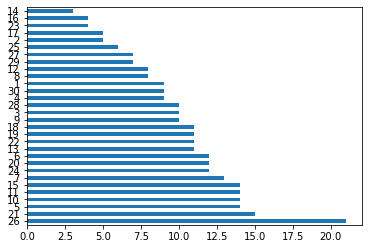

In [13]:
df_loginday1.plot.barh() 

([<matplotlib.axis.XTick at 0x243bb219e20>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21'),
  Text(0, 0, '22'),
  Text(0, 0, '23'),
  Text(0, 0, '24'),
  Text(0, 0, '25'),
  Text(0, 0, '26'),
  Text(0, 0, '27'),
  Text(0, 0, '28'),
  Text(0, 0, '29'),
  Text(0, 0, '30')])

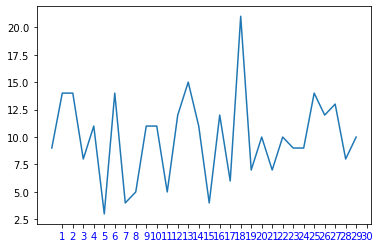

In [14]:
df_loginday2=data2['login_day'].value_counts().sort_index(ascending=True)
df_loginday2.plot()
x= range(1, 31)   #x 轴数据
plt.xticks(x,x[::1],color='blue')

## Active Users

In [15]:
data3 = data2[data2['session_duration']>15]
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              297 non-null    float64
 1   customer_id             297 non-null    float64
 2   login_date              297 non-null    object 
 3   projects_added          297 non-null    object 
 4   likes_given             297 non-null    object 
 5   comment_given           297 non-null    object 
 6   inactive_status         297 non-null    object 
 7   bug_occured             297 non-null    object 
 8   session_projects_added  297 non-null    float64
 9   session_likes_given     297 non-null    float64
 10  session_comments_given  297 non-null    float64
 11  inactive_duration       297 non-null    float64
 12  bugs_in_session         297 non-null    float64
 13  session_duration        297 non-null    float64
 14  login_month             297 non-null    ob

In [16]:
data3['active_index'] = (data3['session_duration']-data3['inactive_duration'])/data3['session_duration']
data3.head()

<ipython-input-16-7adf139baf54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['active_index'] = (data3['session_duration']-data3['inactive_duration'])/data3['session_duration']


,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,login_month,login_day,login_year,active_index
0,624205.0,80746.0,10/30/19,0,1,1,1,0,0.0,24.0,3.0,1146.0,0.0,1564.0,10,30,19,0.267263
1,624241.0,24520.0,10/30/19,1,1,1,1,0,2.0,3.0,5.0,133.0,0.0,1766.0,10,30,19,0.924689
2,111002.0,32047.0,10/30/19,1,1,1,1,0,1.0,5.0,5.0,1571.0,0.0,2230.0,10,30,19,0.295516
3,545113.0,23404.0,10/30/19,1,1,1,0,0,1.0,10.0,21.0,0.0,0.0,633.0,10,30,19,1.000000
4,750269.0,40235.0,10/30/19,1,1,0,1,0,3.0,16.0,0.0,1405.0,0.0,1679.0,10,30,19,0.163192


In [17]:
bin = [-100,0,0.2,0.5,0.8,1]
active_level = pd.cut(data3['active_index'],bin,labels=['error_value','inactive','relatively_inactive','relatively_active','active'])
pd.value_counts(active_level)

active                 145
error_value             87
relatively_inactive     25
inactive                21
relatively_active       19
Name: active_index, dtype: int64

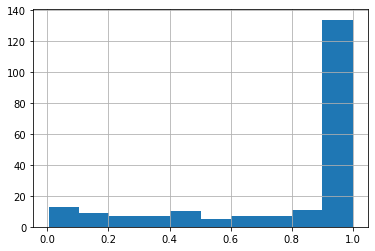

In [18]:
data4 = data3[data3['active_index']>0]
data4['active_index'].hist()

## Simple Visualization of Project Added and Like and Comments Given

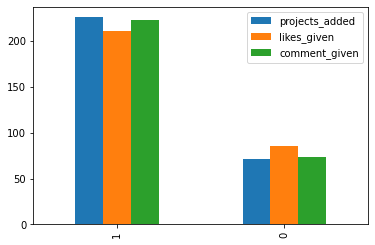

In [19]:
cols = ['projects_added','likes_given','comment_given']
df1 = pd.DataFrame(data3,columns = cols)
combination_plt = df1.apply(pd.Series.value_counts)
combination_plt.plot.bar()

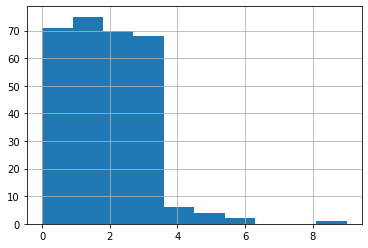

In [21]:
data3['session_projects_added'].hist()

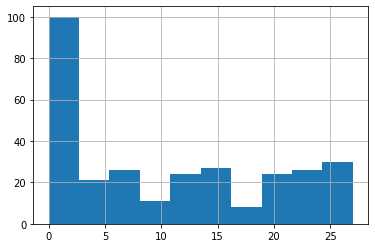

In [22]:
data3['session_likes_given'].hist()

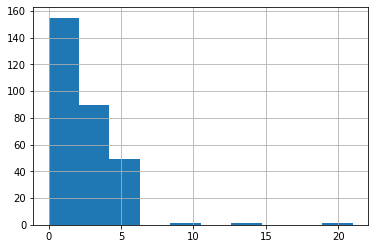

In [23]:
data3['session_comments_given'].hist()

## Bugs

In [32]:
data3['bugs_in_session'].value_counts()

0.0    181
2.0     28
4.0     28
5.0     24
3.0     23
1.0     13
Name: bugs_in_session, dtype: int64

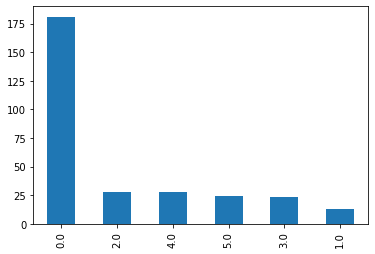

In [31]:
data3['bugs_in_session'].value_counts().plot.bar()

## Relationship Between Active Index and Other Variables

In [48]:
y=data4['active_index']
cols = ['session_projects_added','session_likes_given','session_comments_given','bugs_in_session']
X = pd.DataFrame(data4,columns = cols)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [49]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print("{}:r2_train={}".format("Linear Regression",r2_train))
print("{}:r2_test={}".format("Linear Regression",r2_test))

mse_train=mean_squared_error(y_train,y_pred_train)
print("{}:mse_train={}".format("Linear Regression",mse_train))

#caculate mse in testset
mse_test=mean_squared_error(y_test,y_pred_test)
print("{}:mse_test={}".format("Linear Regression",mse_test))

Linear Regression:r2_train=0.033620966148516396
Linear Regression:r2_test=-0.03225602999273658
Linear Regression:mse_train=0.09794582236272611
Linear Regression:mse_test=0.10745491934656358


In [50]:
lr.coef_

array([ 0.0332766 ,  0.00357646,  0.00459658, -0.01600246])

In [51]:
lr.intercept_

0.7121144950902093

In [52]:
lr.score(X_train,y_train)

0.033620966148516396

In [53]:
lr.score(X_test,y_test)

-0.03225602999273658